# LOW CODE ASSIGNMENTS PART 2

## **Pycaret: Time Series Forecasting - Univariate without Exogenous Variables**

#### Installing required libraries

In [1]:
!pip install pycaret
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 950.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

<br>
<br>
<br>

### **Downloading the Sunspots Dataset**

In [2]:
!kaggle datasets download -d robervalt/sunspots

Dataset URL: https://www.kaggle.com/datasets/robervalt/sunspots
License(s): CC0-1.0
  0% 0.00/22.4k [00:00<?, ?B/s]
100% 22.4k/22.4k [00:00<00:00, 2.63MB/s]


In [3]:
!unzip sunspots.zip

Archive:  sunspots.zip
  inflating: Sunspots.csv            


### **Loading required libraries**

In [4]:
import numpy as np
import pandas as pd
from pycaret.time_series import *
import matplotlib.pyplot as plt

<br>
<br>
<br>


### **Loading the Sunspots Dataset**

In [5]:
print("Loading Kaggle Sunspots dataset...")
data = pd.read_csv('Sunspots.csv', nrows=1000)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

last_date = data.index.max()
print(f"Last available date in the dataset: {last_date}")
data.head()

Loading Kaggle Sunspots dataset...
Last available date in the dataset: 1832-04-30 00:00:00


,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


<Axes: xlabel='Date'>

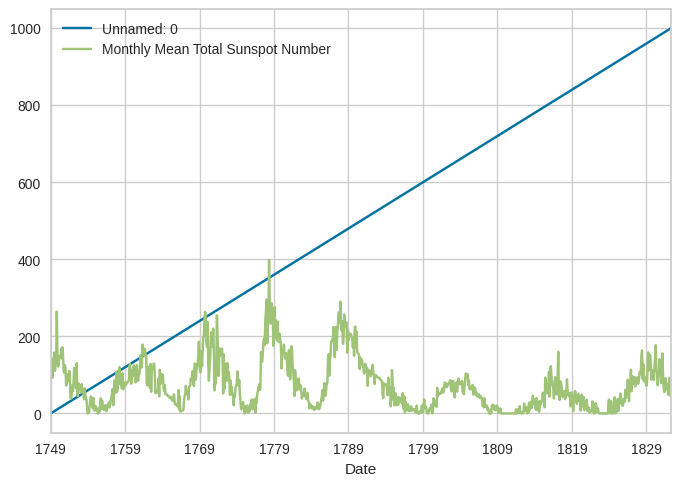

In [6]:
data.plot()

### **Setting up Pycaret**

In [7]:
clf_setup = setup(data=data, target='Monthly Mean Total Sunspot Number', session_id=123, fh=12)

,Description,Value
0,session_id,123
1,Target,Monthly Mean Total Sunspot Number
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1000, 2)"
5,Transformed data shape,"(1000, 2)"
6,Transformed train set shape,"(988, 2)"
7,Transformed test set shape,"(12, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
# Directly create an ARIMA model
model = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1828-04,0.6277,0.5456,30.7748,36.6836,0.2641,0.2894,-0.3462
1,1829-04,0.3970,0.3371,19.4189,22.5998,0.1746,0.1637,0.2628
2,1830-04,0.6702,0.6232,32.6058,41.5889,0.3210,0.2847,-1.4593
Mean,NaT,0.5650,0.5019,27.5998,33.6241,0.2532,0.2459,-0.5142
SD,NaT,0.1200,0.1208,5.8329,8.0485,0.0602,0.0582,0.7130


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
plot_model(model, plot='forecast')
plot_model(model, plot='diagnostics')

In [10]:
# Make predictions for the next 12 periods
predictions = predict_model(model, fh=12)
print(predictions)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.9043,0.7405,43.7982,49.2132,0.6977,0.4837,-7.8719


           y_pred
1831-05  104.9896
1831-06  135.9913
1831-07  116.0799
1831-08   76.7184
1831-09   85.6604
1831-10  104.4514
1831-11   87.0295
1831-12   80.9275
1832-01  114.8729
1832-02  136.4889
1832-03  173.3955
1832-04  107.1093
